# Text Representation for Machine Learning

---

## Table of Contents
1. [Introduction](#introduction)
2. [Why Text Representation Matters](#why-matters)
3. [One-Hot Encoding](#one-hot)
4. [Bag of Words (BoW)](#bow)
5. [N-Grams](#ngrams)
6. [TF-IDF (Term Frequency-Inverse Document Frequency)](#tfidf)
7. [Comparison of Methods](#comparison)
8. [Real-World Application](#real-world)
9. [Best Practices](#best-practices)

---

## 1. Introduction <a id='introduction'></a>

Machine learning models work with **numbers**, not text. Text representation (also called **feature extraction** or **vectorization**) is the process of converting text into numerical features.

### The Challenge:

```
Text:    "I love machine learning"
          ↓  [Need to convert]  ↓
Numbers: [0.2, 0.5, 0.8, 0.3, ...]
```

### Methods We'll Cover:

1. **One-Hot Encoding**: Binary representation of words
2. **Bag of Words (BoW)**: Count-based word representation
3. **N-Grams**: Sequences of N consecutive words
4. **TF-IDF**: Weighted word importance

### What We'll Learn:
- How each method works
- Advantages and disadvantages
- When to use each method
- Python implementation

In [1]:
# Setup: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# NLTK for preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Scikit-learn for vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Why Text Representation Matters <a id='why-matters'></a>

### The Problem:

Machine learning algorithms (SVM, Random Forest, Neural Networks, etc.) require:
- **Fixed-size input**: Same number of features for all samples
- **Numerical values**: Can't process strings directly
- **Mathematical operations**: Addition, multiplication, distance calculations

### Text Characteristics:

- **Variable length**: Sentences have different numbers of words
- **High dimensionality**: Large vocabulary = many features
- **Sparse data**: Most words don't appear in most documents

### Key Concepts:

| Concept | Definition |
|---------|------------|
| **Vocabulary** | Set of all unique words in corpus |
| **Document** | Single text instance (sentence, paragraph, article) |
| **Feature Vector** | Numerical representation of a document |
| **Sparse Matrix** | Matrix with mostly zero values |
| **Dimensionality** | Number of features (often = vocabulary size) |

## 3. One-Hot Encoding <a id='one-hot'></a>

**One-Hot Encoding** represents each word as a binary vector where:
- Vector length = vocabulary size
- Only one position is 1 (the word's position)
- All other positions are 0

### How it Works:

```
Vocabulary: ["cat", "dog", "bird", "fish"]

"cat"  → [1, 0, 0, 0]
"dog"  → [0, 1, 0, 0]
"bird" → [0, 0, 1, 0]
"fish" → [0, 0, 0, 1]
```

### Advantages:
✅ Simple and intuitive  
✅ Easy to implement  
✅ No information loss

### Disadvantages:
❌ Very high dimensionality (vocab size)  
❌ Extremely sparse vectors  
❌ No semantic meaning (all words equally distant)  
❌ Can't handle out-of-vocabulary words  
❌ Doesn't capture word order or context

In [2]:
# Manual One-Hot Encoding Implementation

# Sample corpus
corpus = [
    "I love NLP",
    "I love machine learning",
    "NLP is amazing"
]

print("Sample Corpus:")
for i, doc in enumerate(corpus, 1):
    print(f"  {i}. {doc}")

# Step 1: Build vocabulary
# Get all unique words (lowercase)
all_words = []
for doc in corpus:
    words = word_tokenize(doc.lower())
    all_words.extend(words)

vocabulary = sorted(set(all_words))
vocab_size = len(vocabulary)

print(f"\nVocabulary ({vocab_size} words): {vocabulary}")

# Step 2: Create word-to-index mapping
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}

print("\nWord-to-Index Mapping:")
for word, idx in word_to_idx.items():
    print(f"  {word:15} → index {idx}")

Sample Corpus:
  1. I love NLP
  2. I love machine learning
  3. NLP is amazing

Vocabulary (7 words): ['amazing', 'i', 'is', 'learning', 'love', 'machine', 'nlp']

Word-to-Index Mapping:
  amazing         → index 0
  i               → index 1
  is              → index 2
  learning        → index 3
  love            → index 4
  machine         → index 5
  nlp             → index 6


In [3]:
# Step 3: One-hot encode individual words

def one_hot_encode_word(word, vocabulary):
    """
    Create one-hot encoding for a single word.
    
    Args:
        word (str): The word to encode
        vocabulary (list): List of all vocabulary words
    
    Returns:
        np.array: One-hot encoded vector
    """
    # Create zero vector
    vector = np.zeros(len(vocabulary))
    
    # Set the position of the word to 1
    if word in vocabulary:
        idx = vocabulary.index(word)
        vector[idx] = 1
    
    return vector

# Test with sample words
test_words = ['love', 'nlp', 'machine']

print("One-Hot Encoding Examples:\n")
print(f"Vocabulary: {vocabulary}\n")

for word in test_words:
    vector = one_hot_encode_word(word, vocabulary)
    print(f"Word: '{word}'")
    print(f"Vector: {vector.astype(int)}")
    print(f"Position: {np.where(vector == 1)[0][0]}")
    print()

One-Hot Encoding Examples:

Vocabulary: ['amazing', 'i', 'is', 'learning', 'love', 'machine', 'nlp']

Word: 'love'
Vector: [0 0 0 0 1 0 0]
Position: 4

Word: 'nlp'
Vector: [0 0 0 0 0 0 1]
Position: 6

Word: 'machine'
Vector: [0 0 0 0 0 1 0]
Position: 5



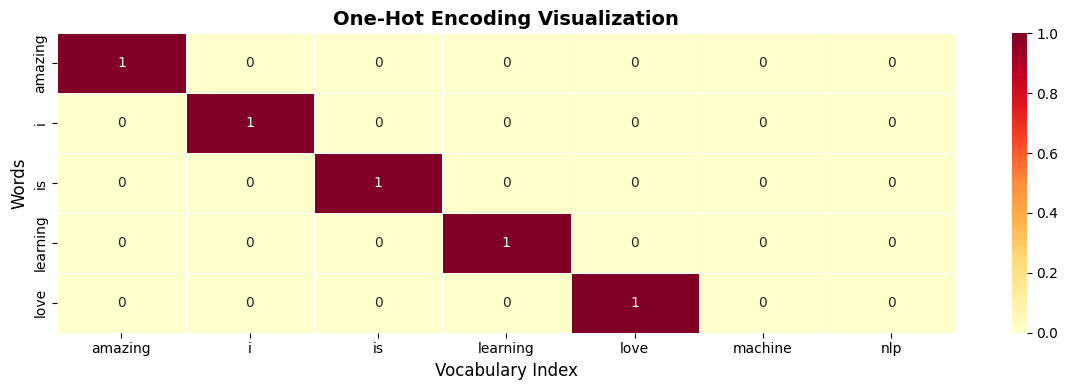

Notice: Each word has exactly one '1' and all other values are '0'


In [4]:
# Visualize one-hot encoding

# Create one-hot vectors for first few words
words_to_visualize = vocabulary[:5]
one_hot_matrix = np.array([one_hot_encode_word(word, vocabulary) for word in words_to_visualize])

# Create heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(one_hot_matrix, 
            cmap='YlOrRd', 
            cbar=True,
            xticklabels=vocabulary,
            yticklabels=words_to_visualize,
            linewidths=0.5,
            annot=True,
            fmt='g')
plt.title('One-Hot Encoding Visualization', fontsize=14, fontweight='bold')
plt.xlabel('Vocabulary Index', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()

print("Notice: Each word has exactly one '1' and all other values are '0'")

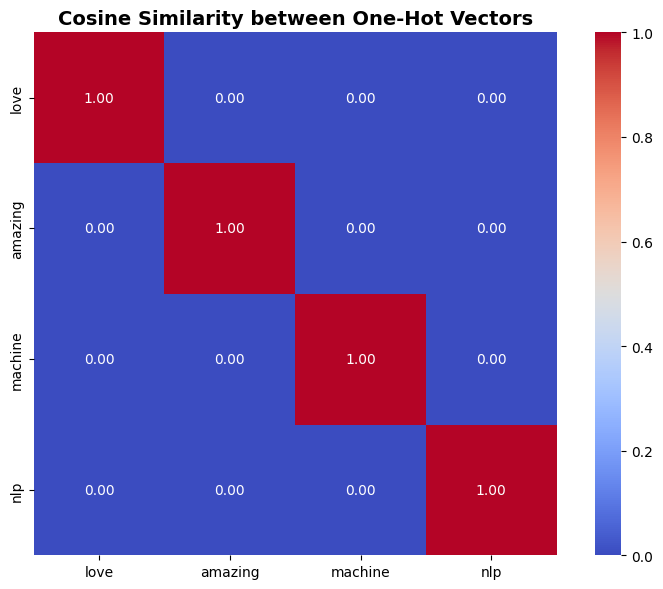


Problem: All different words have similarity = 0
'love' and 'amazing' should be more similar than 'love' and 'nlp'
But one-hot encoding treats all words as equally distant!


In [5]:
# Problem with One-Hot Encoding: No semantic similarity

# Calculate cosine similarity between word vectors
from sklearn.metrics.pairwise import cosine_similarity

words = ['love', 'amazing', 'machine', 'nlp']
vectors = np.array([one_hot_encode_word(w, vocabulary) for w in words])

# Calculate similarity matrix
similarity_matrix = cosine_similarity(vectors)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, 
            annot=True, 
            fmt='.2f',
            xticklabels=words,
            yticklabels=words,
            cmap='coolwarm',
            vmin=0, vmax=1,
            square=True)
plt.title('Cosine Similarity between One-Hot Vectors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nProblem: All different words have similarity = 0")
print("'love' and 'amazing' should be more similar than 'love' and 'nlp'")
print("But one-hot encoding treats all words as equally distant!")

## 4. Bag of Words (BoW) <a id='bow'></a>

**Bag of Words** represents a document as a vector of word counts, ignoring grammar and word order.

### How it Works:

```
Vocabulary: ["cat", "dog", "bird"]

Document 1: "cat dog cat"     → [2, 1, 0]  (2 cats, 1 dog, 0 birds)
Document 2: "dog bird"        → [0, 1, 1]  (0 cats, 1 dog, 1 bird)
Document 3: "cat cat cat cat" → [4, 0, 0]  (4 cats, 0 dogs, 0 birds)
```

### Advantages:
✅ Simple to understand and implement  
✅ Works well for many tasks  
✅ Captures word frequency information  
✅ Can handle any vocabulary size

### Disadvantages:
❌ Loses word order ("dog bites man" = "man bites dog")  
❌ Loses semantic meaning  
❌ Sparse vectors for large vocabularies  
❌ Common words dominate ("the", "is", "and")

In [6]:
# Example: Manual Bag of Words

# Sample documents
documents = [
    "I love NLP",
    "I love machine learning",
    "NLP is amazing",
    "Machine learning is the future"
]

print("Documents:")
for i, doc in enumerate(documents, 1):
    print(f"  Doc {i}: {doc}")

# Step 1: Build vocabulary from all documents
all_words = []
for doc in documents:
    words = word_tokenize(doc.lower())
    all_words.extend(words)

vocabulary = sorted(set(all_words))
print(f"\nVocabulary ({len(vocabulary)} words): {vocabulary}")

Documents:
  Doc 1: I love NLP
  Doc 2: I love machine learning
  Doc 3: NLP is amazing
  Doc 4: Machine learning is the future

Vocabulary (9 words): ['amazing', 'future', 'i', 'is', 'learning', 'love', 'machine', 'nlp', 'the']


In [7]:
# Step 2: Create BoW representation manually

def create_bow_vector(document, vocabulary):
    """
    Create Bag of Words vector for a document.
    
    Args:
        document (str): Text document
        vocabulary (list): List of vocabulary words
    
    Returns:
        np.array: BoW vector (word counts)
    """
    # Tokenize and lowercase
    words = word_tokenize(document.lower())
    
    # Count word frequencies
    word_counts = Counter(words)
    
    # Create vector
    vector = np.zeros(len(vocabulary))
    for word, count in word_counts.items():
        if word in vocabulary:
            idx = vocabulary.index(word)
            vector[idx] = count
    
    return vector

# Create BoW matrix for all documents
bow_matrix = np.array([create_bow_vector(doc, vocabulary) for doc in documents])

# Display as DataFrame
df_bow = pd.DataFrame(bow_matrix.astype(int), 
                      columns=vocabulary,
                      index=[f'Doc {i}' for i in range(1, len(documents)+1)])

print("\nBag of Words Matrix:")
print("="*80)
print(df_bow)


Bag of Words Matrix:
       amazing  future  i  is  learning  love  machine  nlp  the
Doc 1        0       0  1   0         0     1        0    1    0
Doc 2        0       0  1   0         1     1        1    0    0
Doc 3        1       0  0   1         0     0        0    1    0
Doc 4        0       1  0   1         1     0        1    0    1


In [8]:
# Using scikit-learn's CountVectorizer (recommended)

# Initialize CountVectorizer
vectorizer = CountVectorizer(lowercase=True, token_pattern=r'\b[a-zA-Z]+\b')

# Fit and transform the documents
# fit: learn vocabulary from documents
# transform: convert documents to BoW vectors
bow_matrix_sklearn = vectorizer.fit_transform(documents)

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame for display
df_bow_sklearn = pd.DataFrame(bow_matrix_sklearn.toarray(),
                               columns=feature_names,
                               index=[f'Doc {i}' for i in range(1, len(documents)+1)])

print("Bag of Words Matrix (using scikit-learn):")
print("="*80)
print(df_bow_sklearn)

print(f"\nMatrix shape: {bow_matrix_sklearn.shape}")
print(f"  {bow_matrix_sklearn.shape[0]} documents")
print(f"  {bow_matrix_sklearn.shape[1]} features (vocabulary size)")

Bag of Words Matrix (using scikit-learn):
       amazing  future  i  is  learning  love  machine  nlp  the
Doc 1        0       0  1   0         0     1        0    1    0
Doc 2        0       0  1   0         1     1        1    0    0
Doc 3        1       0  0   1         0     0        0    1    0
Doc 4        0       1  0   1         1     0        1    0    1

Matrix shape: (4, 9)
  4 documents
  9 features (vocabulary size)


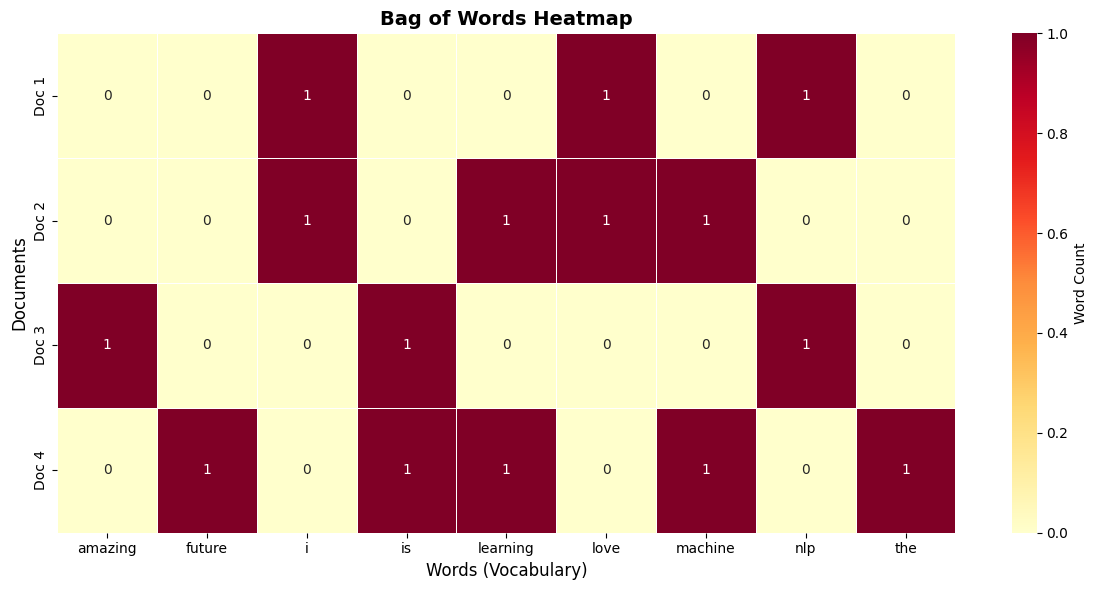

Notice: Numbers represent how many times each word appears in each document


In [9]:
# Visualize BoW matrix

plt.figure(figsize=(12, 6))
sns.heatmap(df_bow_sklearn, 
            annot=True, 
            fmt='g',
            cmap='YlOrRd',
            cbar_kws={'label': 'Word Count'},
            linewidths=0.5)
plt.title('Bag of Words Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Words (Vocabulary)', fontsize=12)
plt.ylabel('Documents', fontsize=12)
plt.tight_layout()
plt.show()

print("Notice: Numbers represent how many times each word appears in each document")

In [10]:
# BoW with preprocessing (removing stopwords)

# Create vectorizer with stopword removal
vectorizer_no_stop = CountVectorizer(
    lowercase=True,
    token_pattern=r'\b[a-zA-Z]+\b',
    stop_words='english'  # Remove English stopwords
)

bow_no_stop = vectorizer_no_stop.fit_transform(documents)
feature_names_no_stop = vectorizer_no_stop.get_feature_names_out()

df_bow_no_stop = pd.DataFrame(bow_no_stop.toarray(),
                               columns=feature_names_no_stop,
                               index=[f'Doc {i}' for i in range(1, len(documents)+1)])

print("Comparison: BoW with vs without stopwords\n")
print("WITH stopwords:")
print(f"  Vocabulary: {list(feature_names)}")
print(f"  Size: {len(feature_names)} words\n")

print("WITHOUT stopwords:")
print(f"  Vocabulary: {list(feature_names_no_stop)}")
print(f"  Size: {len(feature_names_no_stop)} words\n")

print("BoW Matrix (without stopwords):")
print(df_bow_no_stop)

Comparison: BoW with vs without stopwords

WITH stopwords:
  Vocabulary: ['amazing', 'future', 'i', 'is', 'learning', 'love', 'machine', 'nlp', 'the']
  Size: 9 words

WITHOUT stopwords:
  Vocabulary: ['amazing', 'future', 'learning', 'love', 'machine', 'nlp']
  Size: 6 words

BoW Matrix (without stopwords):
       amazing  future  learning  love  machine  nlp
Doc 1        0       0         0     1        0    1
Doc 2        0       0         1     1        1    0
Doc 3        1       0         0     0        0    1
Doc 4        0       1         1     0        1    0


## 5. N-Grams <a id='ngrams'></a>

**N-grams** are sequences of N consecutive words. They capture some word order information.

### Types of N-grams:

- **Unigram** (N=1): Individual words  
  Example: "I", "love", "NLP"

- **Bigram** (N=2): Pairs of consecutive words  
  Example: "I love", "love NLP"

- **Trigram** (N=3): Triplets of consecutive words  
  Example: "I love NLP"

### Example:

```
Sentence: "I love machine learning"

Unigrams:  ["I", "love", "machine", "learning"]
Bigrams:   ["I love", "love machine", "machine learning"]
Trigrams:  ["I love machine", "love machine learning"]
```

### Advantages:
✅ Captures some context and word order  
✅ Can distinguish phrases ("New York" vs "York New")  
✅ Useful for sentiment analysis and text classification

### Disadvantages:
❌ Exponentially increases vocabulary size  
❌ More sparse than unigrams  
❌ Higher memory requirements

In [11]:
# Generate N-grams manually

def generate_ngrams(text, n):
    """
    Generate n-grams from text.
    
    Args:
        text (str): Input text
        n (int): N-gram size (1=unigram, 2=bigram, 3=trigram)
    
    Returns:
        list: List of n-grams
    """
    # Tokenize
    words = word_tokenize(text.lower())
    
    # Generate n-grams
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    
    return ngrams

# Test sentence
sentence = "I love machine learning and NLP"

print(f"Sentence: '{sentence}'\n")
print("="*60)

# Generate different n-grams
for n in [1, 2, 3]:
    ngrams = generate_ngrams(sentence, n)
    ngram_name = {1: 'Unigrams', 2: 'Bigrams', 3: 'Trigrams'}[n]
    print(f"\n{ngram_name} (N={n}):")
    for i, ngram in enumerate(ngrams, 1):
        print(f"  {i}. {ngram}")
    print(f"\nTotal {ngram_name}: {len(ngrams)}")

Sentence: 'I love machine learning and NLP'


Unigrams (N=1):
  1. i
  2. love
  3. machine
  4. learning
  5. and
  6. nlp

Total Unigrams: 6

Bigrams (N=2):
  1. i love
  2. love machine
  3. machine learning
  4. learning and
  5. and nlp

Total Bigrams: 5

Trigrams (N=3):
  1. i love machine
  2. love machine learning
  3. machine learning and
  4. learning and nlp

Total Trigrams: 4


In [12]:
# N-gram BoW using scikit-learn

# Sample documents
docs = [
    "Natural language processing is amazing",
    "Machine learning is the future",
    "Natural language understanding"
]

print("Sample Documents:")
for i, doc in enumerate(docs, 1):
    print(f"  {i}. {doc}")

print("\n" + "="*80 + "\n")

# Create vectorizers for different n-grams
vectorizers = {
    'Unigram': CountVectorizer(ngram_range=(1, 1)),
    'Bigram': CountVectorizer(ngram_range=(2, 2)),
    'Trigram': CountVectorizer(ngram_range=(3, 3)),
    'Unigram + Bigram': CountVectorizer(ngram_range=(1, 2)),
}

for name, vectorizer in vectorizers.items():
    # Fit and transform
    matrix = vectorizer.fit_transform(docs)
    features = vectorizer.get_feature_names_out()
    
    print(f"{name}:")
    print(f"  Vocabulary size: {len(features)}")
    print(f"  Features: {list(features)}")
    print()

Sample Documents:
  1. Natural language processing is amazing
  2. Machine learning is the future
  3. Natural language understanding


Unigram:
  Vocabulary size: 10
  Features: ['amazing', 'future', 'is', 'language', 'learning', 'machine', 'natural', 'processing', 'the', 'understanding']

Bigram:
  Vocabulary size: 9
  Features: ['is amazing', 'is the', 'language processing', 'language understanding', 'learning is', 'machine learning', 'natural language', 'processing is', 'the future']

Trigram:
  Vocabulary size: 7
  Features: ['is the future', 'language processing is', 'learning is the', 'machine learning is', 'natural language processing', 'natural language understanding', 'processing is amazing']

Unigram + Bigram:
  Vocabulary size: 19
  Features: ['amazing', 'future', 'is', 'is amazing', 'is the', 'language', 'language processing', 'language understanding', 'learning', 'learning is', 'machine', 'machine learning', 'natural', 'natural language', 'processing', 'processing is', 't

Bigram BoW Matrix:
       is amazing  is the  language processing  language understanding  \
Doc 1           1       0                    1                       0   
Doc 2           0       1                    0                       0   
Doc 3           0       0                    0                       1   

       learning is  machine learning  natural language  processing is  \
Doc 1            0                 0                 1              1   
Doc 2            1                 1                 0              0   
Doc 3            0                 0                 1              0   

       the future  
Doc 1           0  
Doc 2           1  
Doc 3           0  


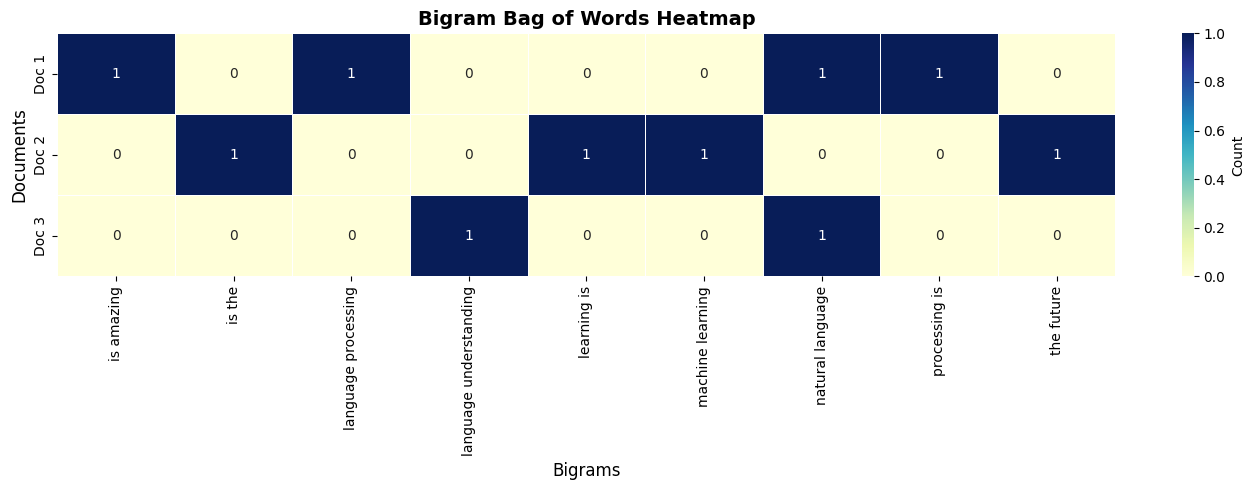

In [13]:
# Detailed example with Bigrams

# Create bigram vectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vectorizer.fit_transform(docs)
bigram_features = bigram_vectorizer.get_feature_names_out()

# Display as DataFrame
df_bigram = pd.DataFrame(bigram_matrix.toarray(),
                         columns=bigram_features,
                         index=[f'Doc {i}' for i in range(1, len(docs)+1)])

print("Bigram BoW Matrix:")
print("="*80)
print(df_bigram)

# Visualize
plt.figure(figsize=(14, 5))
sns.heatmap(df_bigram, 
            annot=True, 
            fmt='g',
            cmap='YlGnBu',
            cbar_kws={'label': 'Count'},
            linewidths=0.5)
plt.title('Bigram Bag of Words Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Bigrams', fontsize=12)
plt.ylabel('Documents', fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
# Practical example: Why bigrams matter

# These two sentences have opposite meanings!
sentences = [
    "The movie is not bad",
    "The movie is bad"
]

print("Example: Why N-grams capture more meaning\n")
print("="*60)

for sentence in sentences:
    print(f"\nSentence: '{sentence}'")
    
    # Unigrams
    unigrams = generate_ngrams(sentence, 1)
    print(f"Unigrams: {unigrams}")
    
    # Bigrams
    bigrams = generate_ngrams(sentence, 2)
    print(f"Bigrams: {bigrams}")

print("\n" + "="*60)
print("\nNotice: Bigram 'not bad' captures the negation!")
print("Unigrams alone can't distinguish between these sentences.")

Example: Why N-grams capture more meaning


Sentence: 'The movie is not bad'
Unigrams: ['the', 'movie', 'is', 'not', 'bad']
Bigrams: ['the movie', 'movie is', 'is not', 'not bad']

Sentence: 'The movie is bad'
Unigrams: ['the', 'movie', 'is', 'bad']
Bigrams: ['the movie', 'movie is', 'is bad']


Notice: Bigram 'not bad' captures the negation!
Unigrams alone can't distinguish between these sentences.


## 6. TF-IDF (Term Frequency-Inverse Document Frequency) <a id='tfidf'></a>

**TF-IDF** is a weighted representation that indicates how important a word is to a document in a collection.

### The Idea:

**Problem with BoW**: Common words like "the", "is", "and" have high counts but low meaning.

**TF-IDF Solution**: 
- Give higher weight to distinctive words
- Give lower weight to common words

### Formula:

```
TF-IDF(word, document) = TF(word, document) × IDF(word)

where:

TF (Term Frequency) = (# of times word appears in document) / (# of total words in document)

IDF (Inverse Document Frequency) = log(# of documents / # of documents containing word)
```

### Intuition:

- **High TF-IDF**: Word appears frequently in THIS document but rarely in others → **Important & Distinctive**
- **Low TF-IDF**: Word appears in many documents → **Common & Less Important**

### Example:

```
Document 1: "The cat sat on the mat"
Document 2: "The dog sat on the log"
Document 3: "Cats and dogs are great pets"

Word "the": Appears in docs 1 and 2 → Common → Low IDF → Low TF-IDF
Word "cat": Appears only in doc 1 → Rare → High IDF → High TF-IDF (for doc 1)
```

### Advantages:
✅ Handles common vs rare words better than BoW  
✅ No need to manually remove stopwords  
✅ Better feature representation for ML  
✅ Works well for document classification and search

### Disadvantages:
❌ Still doesn't capture word order  
❌ Requires multiple documents for IDF calculation  
❌ Can be affected by document length

In [15]:
# Manual TF-IDF calculation

import math

# Sample corpus
corpus_tfidf = [
    "The cat sat on the mat",
    "The dog sat on the log",
    "Cats and dogs are great pets"
]

print("Sample Corpus:")
for i, doc in enumerate(corpus_tfidf, 1):
    print(f"  Doc {i}: {doc}")

# Step 1: Calculate Term Frequency (TF)
def calculate_tf(document):
    """
    Calculate term frequency for all words in a document.
    TF = (count of word in doc) / (total words in doc)
    """
    words = word_tokenize(document.lower())
    word_count = Counter(words)
    total_words = len(words)
    
    tf = {word: count/total_words for word, count in word_count.items()}
    return tf

# Calculate TF for first document
doc1_tf = calculate_tf(corpus_tfidf[0])

print("\n" + "="*60)
print("\nTerm Frequency (TF) for Document 1:")
print("Formula: TF = (word count) / (total words)\n")
for word, tf in sorted(doc1_tf.items()):
    print(f"  '{word}': {tf:.3f}")

Sample Corpus:
  Doc 1: The cat sat on the mat
  Doc 2: The dog sat on the log
  Doc 3: Cats and dogs are great pets


Term Frequency (TF) for Document 1:
Formula: TF = (word count) / (total words)

  'cat': 0.167
  'mat': 0.167
  'on': 0.167
  'sat': 0.167
  'the': 0.333


In [16]:
# Step 2: Calculate Inverse Document Frequency (IDF)

def calculate_idf(corpus):
    """
    Calculate IDF for all words in corpus.
    IDF = log(total documents / documents containing word)
    """
    # Get all unique words across all documents
    all_words = set()
    for doc in corpus:
        words = set(word_tokenize(doc.lower()))
        all_words.update(words)
    
    # Count documents containing each word
    word_doc_count = {}
    for word in all_words:
        count = sum(1 for doc in corpus if word in word_tokenize(doc.lower()))
        word_doc_count[word] = count
    
    # Calculate IDF
    num_docs = len(corpus)
    idf = {}
    for word, doc_count in word_doc_count.items():
        idf[word] = math.log(num_docs / doc_count)
    
    return idf, word_doc_count

idf_scores, doc_counts = calculate_idf(corpus_tfidf)

print("Inverse Document Frequency (IDF):")
print("Formula: IDF = log(total docs / docs containing word)\n")
print(f"Total documents: {len(corpus_tfidf)}\n")
print(f"{'Word':<10} {'Docs with word':<15} {'IDF Score':<15} {'Interpretation'}")
print("="*70)

for word in sorted(idf_scores.keys()):
    idf = idf_scores[word]
    doc_count = doc_counts[word]
    interpretation = "Common" if idf < 0.5 else "Distinctive"
    print(f"{word:<10} {doc_count:<15} {idf:<15.3f} {interpretation}")

print("\nNotice: Words appearing in fewer documents have higher IDF scores")

Inverse Document Frequency (IDF):
Formula: IDF = log(total docs / docs containing word)

Total documents: 3

Word       Docs with word  IDF Score       Interpretation
and        1               1.099           Distinctive
are        1               1.099           Distinctive
cat        1               1.099           Distinctive
cats       1               1.099           Distinctive
dog        1               1.099           Distinctive
dogs       1               1.099           Distinctive
great      1               1.099           Distinctive
log        1               1.099           Distinctive
mat        1               1.099           Distinctive
on         2               0.405           Common
pets       1               1.099           Distinctive
sat        2               0.405           Common
the        2               0.405           Common

Notice: Words appearing in fewer documents have higher IDF scores


In [17]:
# Step 3: Calculate TF-IDF

def calculate_tfidf_manual(document, idf_scores):
    """
    Calculate TF-IDF for a document.
    TF-IDF = TF × IDF
    """
    tf = calculate_tf(document)
    
    tfidf = {}
    for word, tf_score in tf.items():
        if word in idf_scores:
            tfidf[word] = tf_score * idf_scores[word]
    
    return tfidf

# Calculate TF-IDF for first document
doc1_tfidf = calculate_tfidf_manual(corpus_tfidf[0], idf_scores)

print("TF-IDF Scores for Document 1: 'The cat sat on the mat'\n")
print(f"{'Word':<10} {'TF':<15} {'IDF':<15} {'TF-IDF':<15}")
print("="*55)

doc1_tf = calculate_tf(corpus_tfidf[0])
for word in sorted(doc1_tfidf.keys()):
    tf = doc1_tf[word]
    idf = idf_scores[word]
    tfidf = doc1_tfidf[word]
    print(f"{word:<10} {tf:<15.3f} {idf:<15.3f} {tfidf:<15.3f}")

print("\nObservations:")
print("- 'the': High TF but low IDF → Low TF-IDF (common word)")
print("- 'cat', 'mat': Lower TF but higher IDF → Higher TF-IDF (distinctive)")

TF-IDF Scores for Document 1: 'The cat sat on the mat'

Word       TF              IDF             TF-IDF         
cat        0.167           1.099           0.183          
mat        0.167           1.099           0.183          
on         0.167           0.405           0.068          
sat        0.167           0.405           0.068          
the        0.333           0.405           0.135          

Observations:
- 'the': High TF but low IDF → Low TF-IDF (common word)
- 'cat', 'mat': Lower TF but higher IDF → Higher TF-IDF (distinctive)


In [18]:
# Using scikit-learn's TfidfVectorizer (recommended)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_tfidf)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),
                        columns=feature_names,
                        index=[f'Doc {i}' for i in range(1, len(corpus_tfidf)+1)])

print("TF-IDF Matrix (using scikit-learn):")
print("="*80)
print(df_tfidf.round(3))

print("\nNote: scikit-learn normalizes TF-IDF vectors (length = 1)")

TF-IDF Matrix (using scikit-learn):
         and    are    cat   cats    dog   dogs  great    log    mat     on  \
Doc 1  0.000  0.000  0.428  0.000  0.000  0.000  0.000  0.000  0.428  0.325   
Doc 2  0.000  0.000  0.000  0.000  0.428  0.000  0.000  0.428  0.000  0.325   
Doc 3  0.408  0.408  0.000  0.408  0.000  0.408  0.408  0.000  0.000  0.000   

        pets    sat   the  
Doc 1  0.000  0.325  0.65  
Doc 2  0.000  0.325  0.65  
Doc 3  0.408  0.000  0.00  

Note: scikit-learn normalizes TF-IDF vectors (length = 1)


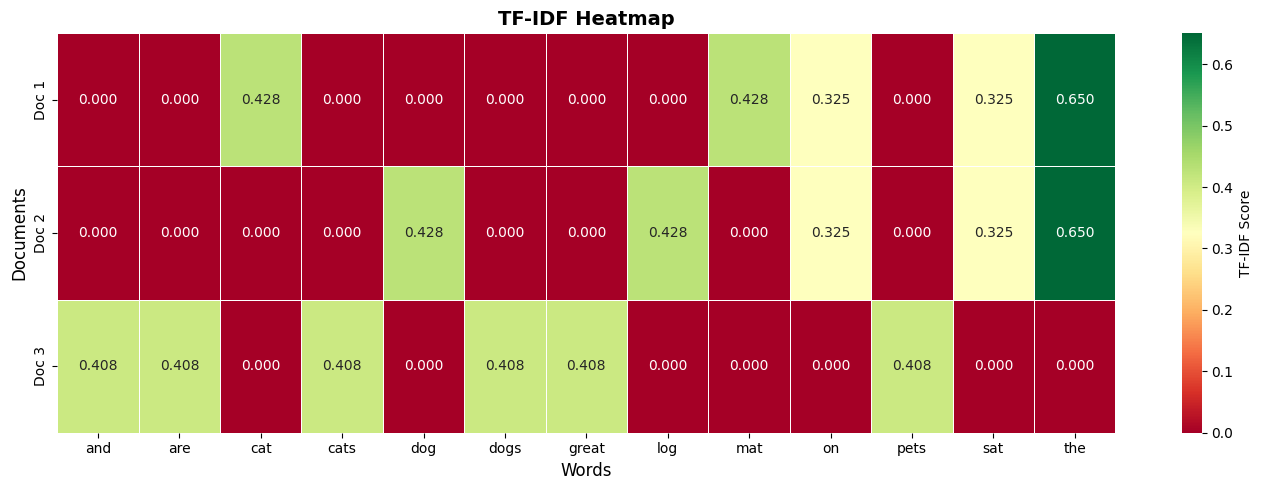

Higher values (green) = more important words for that document
Lower values (red) = less important words


In [19]:
# Visualize TF-IDF matrix

plt.figure(figsize=(14, 5))
sns.heatmap(df_tfidf, 
            annot=True, 
            fmt='.3f',
            cmap='RdYlGn',
            cbar_kws={'label': 'TF-IDF Score'},
            linewidths=0.5)
plt.title('TF-IDF Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Documents', fontsize=12)
plt.tight_layout()
plt.show()

print("Higher values (green) = more important words for that document")
print("Lower values (red) = less important words")

## 7. Comparison of Methods <a id='comparison'></a>

Let's compare all text representation methods side by side.

In [20]:
# Comparison on the same corpus

comparison_corpus = [
    "I love machine learning",
    "I love NLP",
    "Machine learning is amazing"
]

print("Comparison Corpus:")
for i, doc in enumerate(comparison_corpus, 1):
    print(f"  Doc {i}: {doc}")

print("\n" + "="*80 + "\n")

# 1. Bag of Words
bow_vec = CountVectorizer()
bow_matrix = bow_vec.fit_transform(comparison_corpus)
df_bow_comp = pd.DataFrame(bow_matrix.toarray(),
                           columns=bow_vec.get_feature_names_out(),
                           index=[f'Doc {i}' for i in range(1, 4)])

print("1. BAG OF WORDS (BoW):")
print(df_bow_comp)
print(f"\nVocabulary size: {len(bow_vec.get_feature_names_out())}")
print("Values: Word counts\n")

# 2. Bigram BoW
bigram_vec = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vec.fit_transform(comparison_corpus)
df_bigram_comp = pd.DataFrame(bigram_matrix.toarray(),
                               columns=bigram_vec.get_feature_names_out(),
                               index=[f'Doc {i}' for i in range(1, 4)])

print("="*80)
print("\n2. BIGRAM BAG OF WORDS:")
print(df_bigram_comp)
print(f"\nVocabulary size: {len(bigram_vec.get_feature_names_out())}")
print("Values: Bigram counts\n")

# 3. TF-IDF
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(comparison_corpus)
df_tfidf_comp = pd.DataFrame(tfidf_matrix.toarray(),
                              columns=tfidf_vec.get_feature_names_out(),
                              index=[f'Doc {i}' for i in range(1, 4)])

print("="*80)
print("\n3. TF-IDF:")
print(df_tfidf_comp.round(3))
print(f"\nVocabulary size: {len(tfidf_vec.get_feature_names_out())}")
print("Values: TF-IDF scores (normalized)")

Comparison Corpus:
  Doc 1: I love machine learning
  Doc 2: I love NLP
  Doc 3: Machine learning is amazing


1. BAG OF WORDS (BoW):
       amazing  is  learning  love  machine  nlp
Doc 1        0   0         1     1        1    0
Doc 2        0   0         0     1        0    1
Doc 3        1   1         1     0        1    0

Vocabulary size: 6
Values: Word counts


2. BIGRAM BAG OF WORDS:
       is amazing  learning is  love machine  love nlp  machine learning
Doc 1           0            0             1         0                 1
Doc 2           0            0             0         1                 0
Doc 3           1            1             0         0                 1

Vocabulary size: 5
Values: Bigram counts


3. TF-IDF:
       amazing     is  learning   love  machine    nlp
Doc 1    0.000  0.000     0.577  0.577    0.577  0.000
Doc 2    0.000  0.000     0.000  0.605    0.000  0.796
Doc 3    0.563  0.563     0.428  0.000    0.428  0.000

Vocabulary size: 6
Values: TF-IDF sc

In [21]:
# Summary comparison table

comparison_data = {
    'Method': ['One-Hot', 'BoW', 'N-gram BoW', 'TF-IDF'],
    'Captures Word Order': ['No', 'No', 'Partial', 'No'],
    'Handles Frequency': ['No', 'Yes', 'Yes', 'Yes (weighted)'],
    'Vocabulary Size': ['Large', 'Large', 'Very Large', 'Large'],
    'Sparsity': ['Very High', 'High', 'Very High', 'High'],
    'Semantic Meaning': ['No', 'No', 'No', 'No'],
    'Complexity': ['Low', 'Low', 'Medium', 'Medium'],
    'Best For': [
        'Simple classification',
        'Document classification',
        'Phrase detection',
        'Search & classification'
    ]
}

df_comparison = pd.DataFrame(comparison_data)

print("\nCOMPARISON SUMMARY:")
print("="*100)
print(df_comparison.to_string(index=False))

print("\n" + "="*100)
print("\nKEY TAKEAWAYS:")
print("  ✓ All methods lose semantic meaning")
print("  ✓ TF-IDF generally performs best for traditional ML")
print("  ✓ N-grams capture some context but increase dimensionality")
print("  ✓ For semantic meaning, use word embeddings (next notebooks)")


COMPARISON SUMMARY:
    Method Captures Word Order Handles Frequency Vocabulary Size  Sparsity Semantic Meaning Complexity                Best For
   One-Hot                  No                No           Large Very High               No        Low   Simple classification
       BoW                  No               Yes           Large      High               No        Low Document classification
N-gram BoW             Partial               Yes      Very Large Very High               No     Medium        Phrase detection
    TF-IDF                  No    Yes (weighted)           Large      High               No     Medium Search & classification


KEY TAKEAWAYS:
  ✓ All methods lose semantic meaning
  ✓ TF-IDF generally performs best for traditional ML
  ✓ N-grams capture some context but increase dimensionality
  ✓ For semantic meaning, use word embeddings (next notebooks)


## 8. Real-World Application: Movie Review Classification <a id='real-world'></a>

Let's apply different text representations to classify movie reviews.

In [22]:
# Create a realistic movie review dataset

reviews = [
    "This movie was absolutely fantastic! Best film of the year.",
    "Terrible waste of time. Horrible acting and boring plot.",
    "Amazing storyline with brilliant performances. Highly recommend!",
    "Very disappointing. Expected much better from this director.",
    "Loved every minute of it! The cinematography was stunning.",
    "Awful movie. Would not recommend to anyone.",
    "Pretty good overall, though the ending could have been better.",
    "Incredible film! A masterpiece that everyone should watch.",
    "Boring and predictable. Nothing special or memorable.",
    "Excellent movie with great character development."
]

# Labels: 1 = positive, 0 = negative
labels = [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]

# Create DataFrame
df_reviews = pd.DataFrame({
    'review': reviews,
    'sentiment': labels,
    'sentiment_label': ['Positive' if l == 1 else 'Negative' for l in labels]
})

print("Movie Review Dataset:")
print("="*80)
print(df_reviews[['review', 'sentiment_label']])

print(f"\nTotal reviews: {len(df_reviews)}")
print(f"Positive: {sum(labels)} | Negative: {len(labels) - sum(labels)}")

Movie Review Dataset:
                                              review sentiment_label
0  This movie was absolutely fantastic! Best film...        Positive
1  Terrible waste of time. Horrible acting and bo...        Negative
2  Amazing storyline with brilliant performances....        Positive
3  Very disappointing. Expected much better from ...        Negative
4  Loved every minute of it! The cinematography w...        Positive
5        Awful movie. Would not recommend to anyone.        Negative
6  Pretty good overall, though the ending could h...        Positive
7  Incredible film! A masterpiece that everyone s...        Positive
8  Boring and predictable. Nothing special or mem...        Negative
9  Excellent movie with great character development.        Positive

Total reviews: 10
Positive: 6 | Negative: 4


In [23]:
# Compare BoW vs TF-IDF for classification

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_reviews['review'], 
    df_reviews['sentiment'],
    test_size=0.3,
    random_state=42
)

print(f"Training set: {len(X_train)} reviews")
print(f"Test set: {len(X_test)} reviews\n")

# Method 1: Bag of Words
print("="*80)
print("METHOD 1: BAG OF WORDS")
print("="*80)

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

print(f"Vocabulary size: {len(bow_vectorizer.get_feature_names_out())}")
print(f"Feature matrix shape: {X_train_bow.shape}\n")

# Train classifier
clf_bow = MultinomialNB()
clf_bow.fit(X_train_bow, y_train)

# Predict
y_pred_bow = clf_bow.predict(X_test_bow)
accuracy_bow = accuracy_score(y_test, y_pred_bow)

print(f"Accuracy: {accuracy_bow:.2%}\n")

# Method 2: TF-IDF
print("="*80)
print("METHOD 2: TF-IDF")
print("="*80)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Vocabulary size: {len(tfidf_vectorizer.get_feature_names_out())}")
print(f"Feature matrix shape: {X_train_tfidf.shape}\n")

# Train classifier
clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train_tfidf, y_train)

# Predict
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"Accuracy: {accuracy_tfidf:.2%}\n")

# Comparison
print("="*80)
print("COMPARISON")
print("="*80)
print(f"Bag of Words accuracy: {accuracy_bow:.2%}")
print(f"TF-IDF accuracy:       {accuracy_tfidf:.2%}")
print(f"\nDifference: {abs(accuracy_bow - accuracy_tfidf):.2%}")

Training set: 7 reviews
Test set: 3 reviews

METHOD 1: BAG OF WORDS
Vocabulary size: 48
Feature matrix shape: (7, 48)

Accuracy: 0.00%

METHOD 2: TF-IDF
Vocabulary size: 48
Feature matrix shape: (7, 48)

Accuracy: 0.00%

COMPARISON
Bag of Words accuracy: 0.00%
TF-IDF accuracy:       0.00%

Difference: 0.00%


In [ ]:
# Test with new reviews

new_reviews = [
    "Absolutely brilliant! One of the best movies I've ever seen.",
    "Complete waste of money. Terrible in every way.",
    "Not bad, but nothing spectacular either."
]

print("Testing with New Reviews:\n")
print("="*80)

# Transform new reviews
new_bow = bow_vectorizer.transform(new_reviews)
new_tfidf = tfidf_vectorizer.transform(new_reviews)

# Predict
pred_bow = clf_bow.predict(new_bow)
pred_tfidf = clf_tfidf.predict(new_tfidf)

# Display results
for i, review in enumerate(new_reviews):
    bow_sentiment = "Positive" if pred_bow[i] == 1 else "Negative"
    tfidf_sentiment = "Positive" if pred_tfidf[i] == 1 else "Negative"
    
    print(f"\nReview {i+1}: '{review}'")
    print(f"  BoW prediction:    {bow_sentiment}")
    print(f"  TF-IDF prediction: {tfidf_sentiment}")

## 9. Best Practices <a id='best-practices'></a>

### Choosing the Right Method:

| Use Case | Recommended Method | Why? |
|----------|-------------------|------|
| **Document Classification** | TF-IDF | Handles common words better |
| **Sentiment Analysis** | TF-IDF or Bigrams | Captures some context |
| **Search/Information Retrieval** | TF-IDF | Ranks documents by relevance |
| **Topic Modeling** | BoW or TF-IDF | Simpler, interpretable |
| **Phrase Detection** | N-grams (bigrams/trigrams) | Captures multi-word expressions |
| **Spam Detection** | BoW or TF-IDF | Simple features work well |

### General Guidelines:

1. **Start Simple**
   - Begin with BoW or TF-IDF
   - Add complexity only if needed

2. **Preprocessing Matters**
   - Always preprocess before vectorization
   - Remove stopwords (or let TF-IDF handle them)
   - Consider lemmatization

3. **Handle Large Vocabularies**
   - Use `max_features` parameter to limit vocabulary
   - Remove very rare words (`min_df` parameter)
   - Remove very common words (`max_df` parameter)

4. **N-gram Considerations**
   - Bigrams often sufficient
   - Trigrams+ increase sparsity significantly
   - Consider `ngram_range=(1, 2)` for unigrams + bigrams

5. **Memory & Performance**
   - Use sparse matrices (default in scikit-learn)
   - Consider vocabulary size vs. performance tradeoff
   - Monitor memory usage for large datasets

### Common Parameters:

```python
# Example of well-configured vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,      # Limit to 5000 most important words
    min_df=2,               # Ignore words appearing in < 2 documents
    max_df=0.8,             # Ignore words appearing in > 80% of documents
    ngram_range=(1, 2),     # Use unigrams and bigrams
    stop_words='english',   # Remove English stopwords
    lowercase=True,         # Convert to lowercase
    token_pattern=r'\b[a-zA-Z]{2,}\b'  # Only words with 2+ letters
)
```

In [24]:
# Example: Optimized vectorizer configuration

# Create a larger sample corpus
large_corpus = reviews * 5  # Repeat reviews to simulate larger dataset

print("Comparing Different Vectorizer Configurations:\n")
print("="*80)

# Configuration 1: Basic
vec_basic = TfidfVectorizer()
matrix_basic = vec_basic.fit_transform(large_corpus)
print(f"\n1. BASIC TfidfVectorizer:")
print(f"   Vocabulary size: {len(vec_basic.get_feature_names_out())}")
print(f"   Matrix shape: {matrix_basic.shape}")
print(f"   Memory usage: ~{matrix_basic.data.nbytes / 1024:.2f} KB")

# Configuration 2: Optimized
vec_optimized = TfidfVectorizer(
    max_features=20,
    min_df=2,
    ngram_range=(1, 2),
    stop_words='english'
)
matrix_optimized = vec_optimized.fit_transform(large_corpus)
print(f"\n2. OPTIMIZED TfidfVectorizer:")
print(f"   Vocabulary size: {len(vec_optimized.get_feature_names_out())}")
print(f"   Matrix shape: {matrix_optimized.shape}")
print(f"   Memory usage: ~{matrix_optimized.data.nbytes / 1024:.2f} KB")

# Configuration 3: N-grams only
vec_bigram = TfidfVectorizer(
    ngram_range=(2, 2),
    max_features=20
)
matrix_bigram = vec_bigram.fit_transform(large_corpus)
print(f"\n3. BIGRAM-ONLY TfidfVectorizer:")
print(f"   Vocabulary size: {len(vec_bigram.get_feature_names_out())}")
print(f"   Matrix shape: {matrix_bigram.shape}")
print(f"   Top bigrams: {list(vec_bigram.get_feature_names_out()[:10])}")

print("\n" + "="*80)
print("\nConclusion: Optimized configuration reduces vocabulary while retaining information")

Comparing Different Vectorizer Configurations:


1. BASIC TfidfVectorizer:
   Vocabulary size: 66
   Matrix shape: (50, 66)
   Memory usage: ~3.12 KB

2. OPTIMIZED TfidfVectorizer:
   Vocabulary size: 20
   Matrix shape: (50, 20)
   Memory usage: ~1.02 KB

3. BIGRAM-ONLY TfidfVectorizer:
   Vocabulary size: 20
   Matrix shape: (50, 20)
   Top bigrams: ['absolutely fantastic', 'movie would', 'much better', 'not recommend', 'nothing special', 'of it', 'of the', 'of time', 'or memorable', 'overall though']


Conclusion: Optimized configuration reduces vocabulary while retaining information


## Summary

In this notebook, we covered:

✅ **One-Hot Encoding**: Binary representation, very sparse  
✅ **Bag of Words (BoW)**: Count-based representation  
✅ **N-Grams**: Capturing word sequences (bigrams, trigrams)  
✅ **TF-IDF**: Weighted importance-based representation  
✅ **Comparison**: When to use each method  
✅ **Real-World Application**: Movie review classification  
✅ **Best Practices**: Optimization and configuration

### Key Takeaways:

1. **All classical methods have limitations**
   - No semantic meaning
   - No word order (except N-grams partially)
   - High dimensionality and sparsity

2. **TF-IDF is often the best classical choice**
   - Handles common words well
   - Works well with traditional ML algorithms
   - Good baseline before trying advanced methods

3. **N-grams add context but increase complexity**
   - Bigrams often provide good tradeoff
   - Consider vocabulary size implications

4. **For semantic meaning, we need embeddings**
   - Word embeddings (Word2Vec, GloVe)
   - Covered in later notebooks

---

**Next Notebook**: `03_POS_Tagging.ipynb` - Part of Speech tagging with NLTK

---